In [1]:
pip install xgboost scikit-learn numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
n_samples = 1000
X = np.random.rand(n_samples, 3) * [10, 3000, 50]  # Scale features
y = 50000 + X[:, 0] * 10000 + X[:, 1] * 10 - X[:, 2] * 300 + np.random.randn(n_samples) * 10000

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
y_pred = xgb_regressor.predict(X_test)

In [7]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [8]:
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 115922857.71640272
Root Mean Squared Error: 10766.747778061987


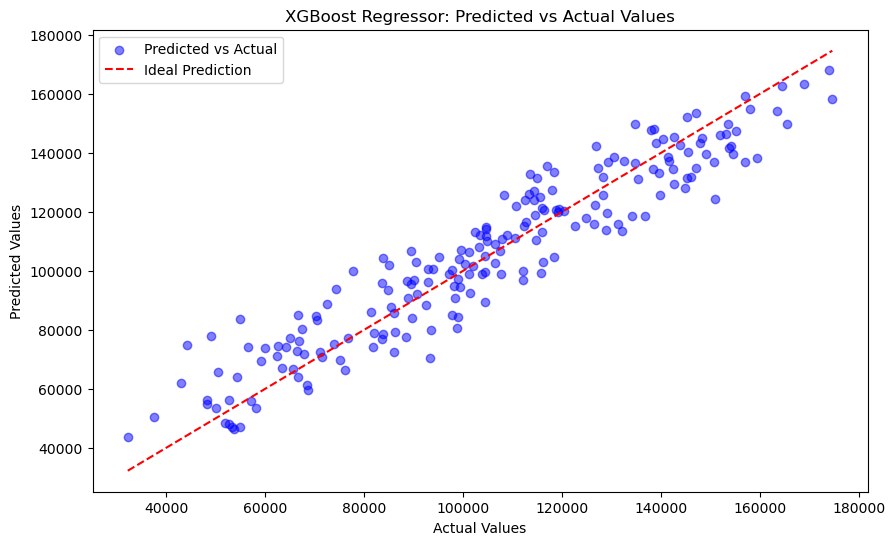

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: Predicted vs Actual Values')
plt.legend()
plt.show()